 **The client implemented auto in-office mobile (AIOM) on February 16 with the goal of increaseing self-service utilization. Has there been any improvement?**

In [24]:
import pandas as pd

intake_performance_data = pd.read_excel('Analyst - Value Analytics Case Study - March 2023_v2 (2) (1).xlsx', sheet_name='Intake Performance Data')
intake_performance_data.head()



,Location Name,Practice Name,Patient Chart Number,Intake Category,Visit ID,Visit Date,Visit Month,Visit Week,Amount Collected,Amount Owed,Copay Collected,Copay Owed,Visit Chg/ Balance Collected,Visit Chg/ Balance Owed,Intake Interview Duration
0,Location 1,Make My Trip LLC,111111.0,Staff,1111111,2022-11-03,11/2022,2022-11-05 23:59:59.999,0.0,1149.1,0.0,0.0,0.0,1149.1,00:00:00
1,Location 1,Make My Trip LLC,111112.0,Staff,1111112,2022-11-01,11/2022,2022-11-05 23:59:59.999,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00
2,Location 1,Make My Trip LLC,111113.0,Staff,1111113,2022-11-03,11/2022,2022-11-05 23:59:59.999,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00
3,Location 1,Make My Trip LLC,111114.0,Self-Service,1111114,2022-11-03,11/2022,2022-11-05 23:59:59.999,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00
4,Location 1,Make My Trip LLC,111115.0,Self-Service,1111115,2022-11-03,11/2022,2022-11-05 23:59:59.999,0.0,20.0,0.0,20.0,0.0,0.0,00:00:00


In [25]:
intake_performance_data.isnull().sum()


Location Name                      0
Practice Name                      0
Patient Chart Number               1
Intake Category                    0
Visit ID                           0
Visit Date                         0
Visit Month                        0
Visit Week                         0
Amount Collected                   0
Amount Owed                        0
Copay Collected                    0
Copay Owed                         0
Visit Chg/ Balance Collected       0
Visit Chg/ Balance Owed            0
Intake Interview Duration       7711
dtype: int64

In [26]:
intake_performance_data['Visit Date'] = pd.to_datetime(intake_performance_data['Visit Date'])


In [27]:
aiom_implementation_date = pd.Timestamp('2023-02-16')


In [28]:
before_aiom = intake_performance_data[intake_performance_data['Visit Date'] < aiom_implementation_date]
after_aiom = intake_performance_data[intake_performance_data['Visit Date'] >= aiom_implementation_date]


In [29]:
self_service_before = before_aiom['Intake Category'].value_counts(normalize=True)['Self-Service']
self_service_after = after_aiom['Intake Category'].value_counts(normalize=True)['Self-Service']

In [30]:
print('Proportion of self-service intakes before AIOM implementation:', self_service_before)
print('Proportion of self-service intakes after AIOM implementation:', self_service_after)

Proportion of self-service intakes before AIOM implementation: 0.5438430921997456
Proportion of self-service intakes after AIOM implementation: 0.5947141692862964


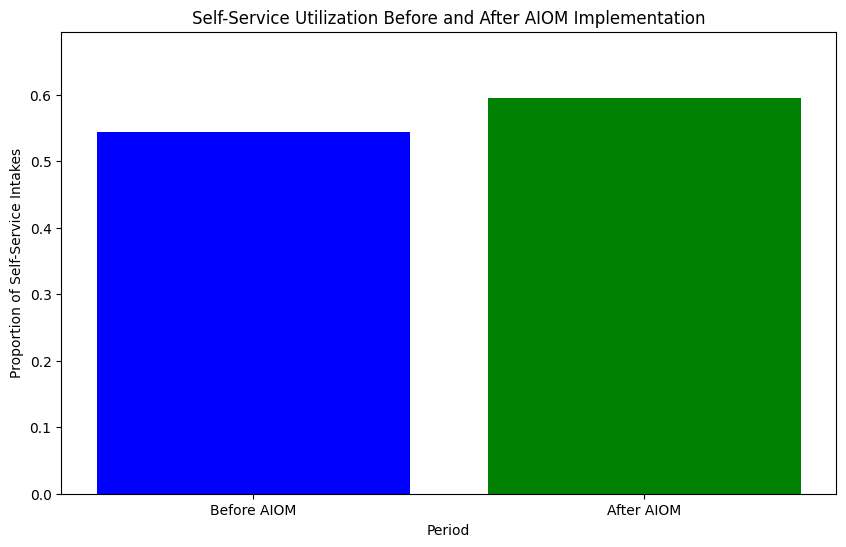

In [31]:
import matplotlib.pyplot as plt

categories = ['Before AIOM', 'After AIOM']
proportions = [self_service_before, self_service_after]

plt.figure(figsize=(10, 6))
plt.bar(categories, proportions, color=['blue', 'green'])
plt.xlabel('Period')
plt.ylabel('Proportion of Self-Service Intakes')
plt.title('Self-Service Utilization Before and After AIOM Implementation')
plt.ylim(0, max(proportions) + 0.1)
plt.show()

**Patient Satisfaction is very important to this client. Is patient satisfaction higher when patients check in self-service or with a staff member? What is the overall satisfaction with digital check in?**



In [32]:
phreesia_experience_data = pd.read_excel('Analyst - Value Analytics Case Study - March 2023_v2 (2) (1).xlsx', sheet_name='Phreesia Experience')

phreesia_experience_data.head()

,Survey,Question,Answer,Patient Chart Number,Visit Date
0,Phreesia Patient Satisfaction (2019),How would you rate your digital check-in exper...,5 (Excellent),114374,2022-11-01
1,Phreesia Patient Satisfaction (2019),How would you rate your digital check-in exper...,4 (Very good),113215,2022-11-01
2,Phreesia Patient Satisfaction (2019),How would you rate your digital check-in exper...,4 (Very good),114190,2022-11-04
3,Phreesia Patient Satisfaction (2019),How would you rate your digital check-in exper...,5 (Excellent),113538,2022-11-04
4,Phreesia Patient Satisfaction (2019),How would you rate your digital check-in exper...,3 (Good),111750,2022-11-01


In [33]:
phreesia_experience_data.isnull().sum()

Survey                    0
Question                  0
Answer                    0
Patient Chart Number      0
Visit Date              359
dtype: int64

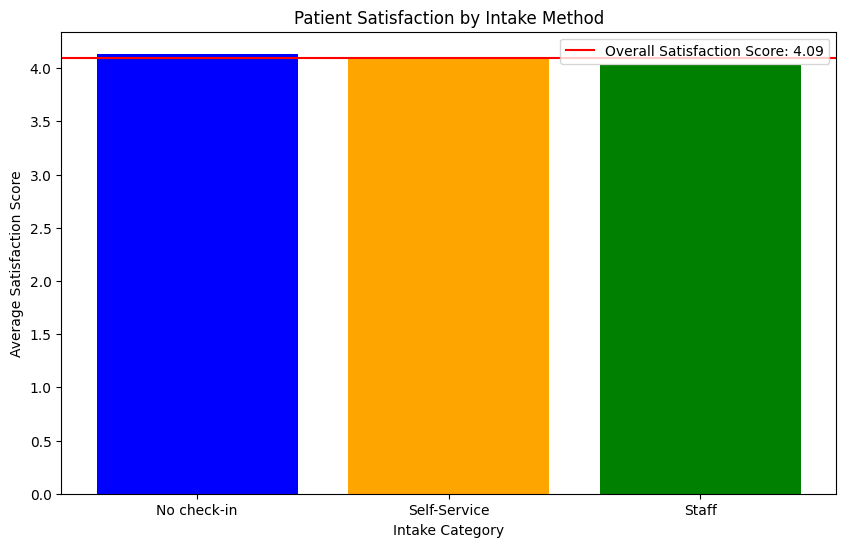

Overall satisfaction score with digital check-in: 4.092289816582289


In [34]:
phreesia_experience_data['Satisfaction Score'] = phreesia_experience_data['Answer'].str.extract('(\d)').astype(float)

intake_performance_data = pd.read_excel('Analyst - Value Analytics Case Study - March 2023_v2 (2) (1).xlsx', sheet_name='Intake Performance Data')

merged_data = phreesia_experience_data.merge(intake_performance_data[['Patient Chart Number', 'Intake Category']], on='Patient Chart Number', how='left')

satisfaction_by_intake = merged_data.groupby('Intake Category')['Satisfaction Score'].mean().reset_index()

overall_satisfaction = merged_data['Satisfaction Score'].mean()

intake_categories = satisfaction_by_intake['Intake Category'].tolist()
satisfaction_scores = satisfaction_by_intake['Satisfaction Score'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(intake_categories, satisfaction_scores, color=['blue', 'orange', 'green'])
plt.axhline(y=overall_satisfaction, color='r', linestyle='-', label=f'Overall Satisfaction Score: {overall_satisfaction:.2f}')
plt.xlabel('Intake Category')
plt.ylabel('Average Satisfaction Score')
plt.title('Patient Satisfaction by Intake Method')
plt.legend()
plt.show()

print('Overall satisfaction score with digital check-in:', overall_satisfaction)

**The client has been focussed on increaseing collections and has a goal of reaching a 25% collection rate. Have they shown any improvement in collection rates? Where do they still have opportunity?**

In [35]:
import numpy as np

intake_performance_data_new = pd.read_excel('Analyst - Value Analytics Case Study - March 2023_v2 (2) (1).xlsx', sheet_name='Intake Performance Data')

intake_performance_data_new['Visit Date'] = pd.to_datetime(intake_performance_data_new['Visit Date'])

intake_performance_data_new['Collection Rate'] = intake_performance_data_new['Amount Collected'] / intake_performance_data_new['Amount Owed']
intake_performance_data_new['Collection Rate'] = intake_performance_data_new['Collection Rate'].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN

average_collection_rate = intake_performance_data_new['Collection Rate'].mean()

opportunities = intake_performance_data_new[intake_performance_data_new['Collection Rate'] < average_collection_rate]

print('Average collection rate across all locations:')
print(average_collection_rate)
print('\
Locations with collection rate below average:')
print(opportunities[['Location Name', 'Collection Rate']].head())

Average collection rate across all locations:
0.5731134457248291
Locations with collection rate below average:
  Location Name  Collection Rate
0    Location 1              0.0
4    Location 1              0.0
5    Location 1              0.0
6    Location 1              0.0
8    Location 1              0.0


**The average collection rate across all locations is approximately 57.31%, which is above the client's goal of reaching a 25% collection rate. This indicates that there has been significant improvement in collection rates.**


The locations listed above have collection rates below the average, indicating potential opportunities for improvement. These locations have a collection rate of 0.0%, suggesting that no collections were made against the amounts owed. The client may want to investigate the reasons behind this and implement strategies to improve collections in these areas.

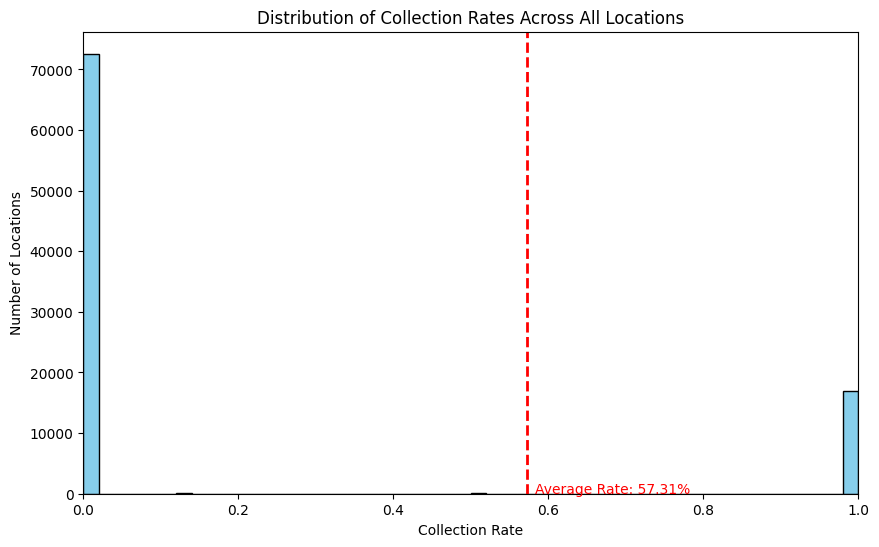

In [36]:
import matplotlib.pyplot as plt
import numpy as np

intake_performance_data_new['Collection Rate'].replace(np.nan, 0, inplace=True)

plt.figure(figsize=(10, 6))
hist_data = intake_performance_data_new['Collection Rate']
plt.hist(hist_data, bins=50, color='skyblue', edgecolor='black')

plt.axvline(average_collection_rate, color='red', linestyle='dashed', linewidth=2)

plt.text(average_collection_rate + 0.01, 50, f'Average Rate: {average_collection_rate:.2%}', color='red')

plt.title('Distribution of Collection Rates Across All Locations')
plt.xlabel('Collection Rate')
plt.ylabel('Number of Locations')
plt.xlim(0, 1)
plt.show()